texto en cursiva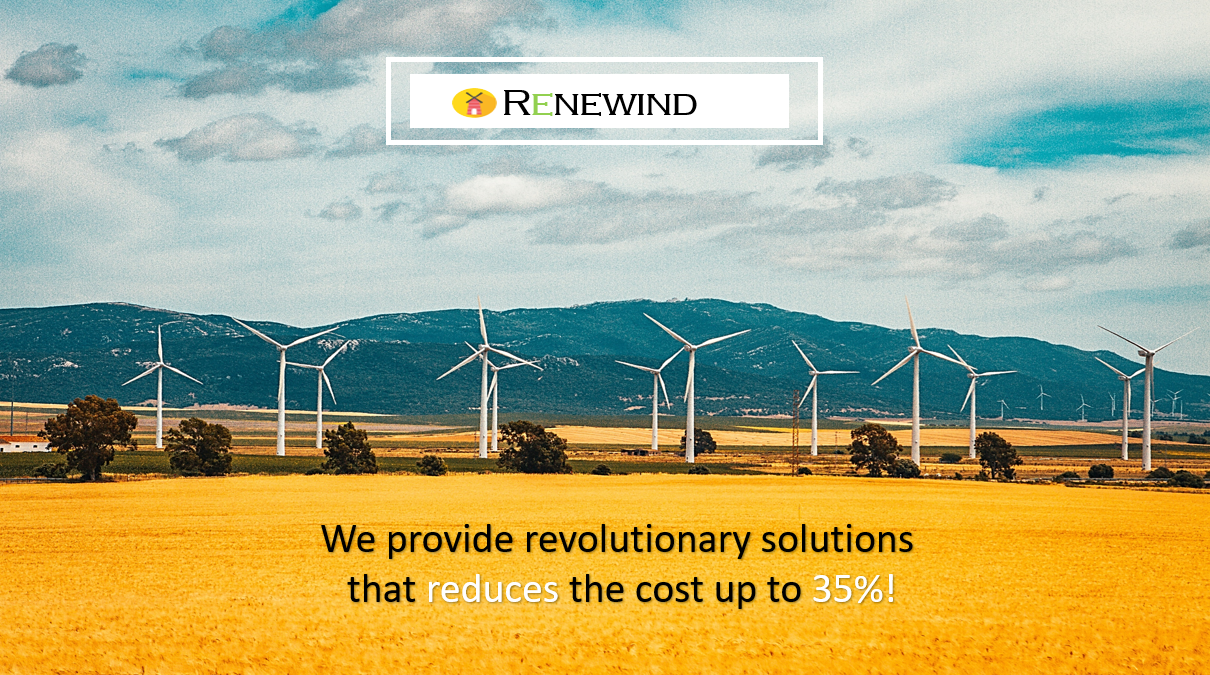




**Context**



Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 

 

**Objective**

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set, and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. The nature of predictions made by the classification model will translate as follows:

True positives (TP) are failures correctly predicted by the model. These will result in repair costs.
False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
False positives (FP) are detections where there is no failure. These will result in inspection costs.
It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of the inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”. 

**Data Description**


-The data provided is a transformed version of original data which was collected using sensors.


-Train.csv - To be used for training and tuning of models. 


-Test.csv - To be used only for testing the performance of the final best model.


-Both the datasets consist of 40 predictor variables and 1 target variable


# **Importing the necessary libraries**




In [256]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

In [257]:

!pip install numpy 
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Loading the dataset**




In [ ]:
df2 = pd.read_csv("Train.csv.csv")
df1 = pd.read_csv("Test.csv.csv")

frames = [df1, df2]
  
df = pd.concat(frames)
display(df)

V1      V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0     -0.613  -3.820  2.202  1.300 -1.185 -4.496 -1.836  4.723  1.206 -0.342   
1      0.390  -0.512  0.527 -2.577 -1.017  2.235 -0.441 -4.406 -0.333  1.967   
2     -0.875  -0.641  4.084 -1.590  0.526 -1.958 -0.695  1.347 -1.732  0.466   
3      0.238   1.459  4.015  2.534  1.197 -3.117 -0.924  0.269  1.322  0.702   
4      5.828   2.768 -1.235  2.809 -1.642 -1.407  0.569  0.965  1.918 -2.775   
...      ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
19995 -2.071  -1.088 -0.796 -3.012 -2.288  2.807  0.481  0.105 -0.587 -2.899   
19996  2.890   2.483  5.644  0.937 -1.381  0.412 -1.593 -5.762  2.150  0.272   
19997 -3.897  -3.942 -0.351 -2.417  1.108 -1.528 -3.520  2.055 -0.234 -0.358   
19998 -3.187 -10.052  5.696 -4.370 -5.355 -1.873 -3.947  0.679 -2.389  5.457   
19999 -2.687   1.961  6.137  2.600  2.657 -4.291 -2.344  0.974 -1.027  0.497   

         V11    V12    V13    V14    V15     V16    V17    V18    V19    V20  \
0     -5.123  1.017  4.819  3.269 -2.984   1.387  2.032 -0.512 -1.023  7.339   
1      1.797  0.410  0.638 -1.390 -1.883  -5.018 -3.827  2.418  1.762 -3.242   
2     -4.928  3.565 -0.449 -0.656 -0.167  -1.630  2.292  2.396  0.601  1.794   
3     -5.578 -0.851  2.591  0.767 -2.391  -2.342  0.572 -0.934  0.509  1.211   
4     -0.530  1.375 -0.651 -1.679 -0.379  -4.443  3.894 -0.608  2.945  0.367   
...      ...    ...    ...    ...    ...     ...    ...    ...    ...    ...   
19995  8.868  1.717  1.358 -1.777  0.710   4.945 -3.100 -1.199 -1.085 -0.365   
19996 -2.095 -1.526  0.072 -3.540 -2.762 -10.632 -0.495  1.720  3.872 -1.210   
19997 -3.782  2.180  6.112  1.985 -8.330  -1.639 -0.915  5.672 -3.924  2.133   
19998  1.583  3.571  9.227  2.554 -7.039  -0.994 -9.665  1.155  3.877  3.524   
19999 -9.589  3.177  1.055 -1.416 -4.669  -5.405  3.720  2.893  2.329  1.458   

         V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0     -2.242  0.155  2.054 -2.772  1.851 -1.789 -0.277 -1.255 -3.833 -1.505   
1     -3.193  1.857 -1.708  0.633 -0.588  0.084  3.014 -0.182  0.224  0.865   
2     -2.120  0.482 -0.841  1.790  1.874  0.364 -0.169 -0.484 -2.119 -2.157   
3     -3.260  0.105 -0.659  1.498  1.100  4.143 -0.248 -1.137 -5.356 -4.546   
4     -5.789  4.598  4.450  3.225  0.397  0.248 -2.362  1.079 -0.473  2.243   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
19995  3.131 -3.948 -3.578 -8.139 -1.937 -1.328 -0.403 -1.735  9.996  6.955   
19996 -8.222  2.121 -5.492  1.452  1.450  3.685  1.077 -0.384 -0.839 -0.748   
19997 -4.502  2.777  5.728  1.620 -1.700 -0.042 -2.923 -2.760 -2.254  2.552   
19998 -7.015 -0.132 -3.446 -4.801 -0.876 -3.812  5.422 -3.732  0.609  5.256   
19999 -6.429  1.818  0.806  7.786  0.331  5.257 -4.867 -0.819 -5.667 -2.861   

         V31    V32    V33    V34    V35    V36    V37     V38    V39    V40  \
0      1.587  2.291 -5.411  0.870  0.574  4.157  1.428 -10.511  0.455 -1.448   
1     -1.782 -2.475  2.494  0.315  2.059  0.684 -0.485   5.128  1.721 -1.488   
2      2.907 -1.319 -2.997  0.460  0.620  5.632  1.324  -1.752  1.808  1.676   
3      3.809  3.518 -3.074 -0.284  0.955  3.029 -1.367  -3.412  0.906 -2.451   
4     -3.591  1.774 -1.502 -2.227  4.777 -6.560 -0.806  -0.276 -3.858 -0.538   
...      ...    ...    ...    ...    ...    ...    ...     ...    ...    ...   
19995 -3.938 -8.274  5.745  0.589 -0.650 -3.043  2.216   0.609  0.178  2.928   
19996 -1.089 -4.159  1.181 -0.742  5.369 -0.693 -1.669   3.660  0.820 -1.987   
19997  0.982  7.112  1.476 -3.954  1.856  5.029  2.083  -6.409  1.477 -0.874   
19998  1.915  0.403  3.164  3.752  8.530  8.451  0.204  -7.130  4.249 -6.112   
19999  4.674  6.621 -1.989 -1.349  3.952  5.450 -0.455  -2.202  1.678 -1.974   

       Target  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
19995       1  
19996       0  
19997       0  
19998       0  
19

# **Data Overview**


The main steps to get an overview of any dataset are the following:

-Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not.

-Get information about the number of rows and columns in the dataset.

-Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

-Check the statistical summary of the dataset to get an overview of the numerical columns of the data.



In [ ]:
# Check the first 5 rows of the data
df.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -0.613 -3.820  2.202  1.300 -1.185 -4.496 -1.836  4.723  1.206 -0.342   
1  0.390 -0.512  0.527 -2.577 -1.017  2.235 -0.441 -4.406 -0.333  1.967   
2 -0.875 -0.641  4.084 -1.590  0.526 -1.958 -0.695  1.347 -1.732  0.466   
3  0.238  1.459  4.015  2.534  1.197 -3.117 -0.924  0.269  1.322  0.702   
4  5.828  2.768 -1.235  2.809 -1.642 -1.407  0.569  0.965  1.918 -2.775   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.123  1.017  4.819  3.269 -2.984  1.387  2.032 -0.512 -1.023  7.339   
1  1.797  0.410  0.638 -1.390 -1.883 -5.018 -3.827  2.418  1.762 -3.242   
2 -4.928  3.565 -0.449 -0.656 -0.167 -1.630  2.292  2.396  0.601  1.794   
3 -5.578 -0.851  2.591  0.767 -2.391 -2.342  0.572 -0.934  0.509  1.211   
4 -0.530  1.375 -0.651 -1.679 -0.379 -4.443  3.894 -0.608  2.945  0.367   

     V21   V22    V23    V24    V25    V26    V27    V28    V29    V30    V31  \
0 -2.242 0.155  2.054 -2.772  1.851 -1.789 -0.277 -1.255 -3.833 -1.505  1.587   
1 -3.193 1.857 -1.708  0.633 -0.588  0.084  3.014 -0.182  0.224  0.865 -1.782   
2 -2.120 0.482 -0.841  1.790  1.874  0.364 -0.169 -0.484 -2.119 -2.157  2.907   
3 -3.260 0.105 -0.659  1.498  1.100  4.143 -0.248 -1.137 -5.356 -4.546  3.809   
4 -5.789 4.598  4.450  3.225  0.397  0.248 -2.362  1.079 -0.473  2.243 -3.591   

     V32    V33    V34   V35    V36    V37     V38    V39    V40  Target  
0  2.291 -5.411  0.870 0.574  4.157  1.428 -10.511  0.455 -1.448       0  
1 -2.475  2.494  0.315 2.059  0.684 -0.485   5.128  1.721 -1.488       0  
2 -1.319 -2.997  0.460 0.620  5.632  1.324  -1.752  1.808  1.676       0  
3  3.518 -3.074 -0.284 0.955  3.029 -1.367  -3.412  0.906 -2.451       0  
4  1.774 -1.502 -2.227 4.777 -6.560 -0.806  -0.276 -3.858 -0.538       0

So far we have 40 predictors for the target variable, which represent different sensors trying to test if the machinery will fail or require maintenance in the future. This could be represented by the target coefficient which can be 1 for failure, or 0 for not failure. 

In [ ]:
# Check the number of rows and columns in the data
df.shape

(25000, 41)

The dataframe is composed by 25000 rows and 41 attributes. 



In [ ]:
# Check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      24977 non-null  float64
 1   V2      24976 non-null  float64
 2   V3      25000 non-null  float64
 3   V4      25000 non-null  float64
 4   V5      25000 non-null  float64
 5   V6      25000 non-null  float64
 6   V7      25000 non-null  float64
 7   V8      25000 non-null  float64
 8   V9      25000 non-null  float64
 9   V10     25000 non-null  float64
 10  V11     25000 non-null  float64
 11  V12     25000 non-null  float64
 12  V13     25000 non-null  float64
 13  V14     25000 non-null  float64
 14  V15     25000 non-null  float64
 15  V16     25000 non-null  float64
 16  V17     25000 non-null  float64
 17  V18     25000 non-null  float64
 18  V19     25000 non-null  float64
 19  V20     25000 non-null  float64
 20  V21     25000 non-null  float64
 21  V22     25000 non-null  float64
 22

Our data is made by 39 floating variables and one target integer variable.

-The two first variables have less than 25000 rows, we will further check the best treatment for our missing values. 

In [ ]:
# Statistical summary of the dataset. 

df.describe(include="all").T

count   mean   std     min    25%    50%    75%    max
V1     24977.000 -0.273 3.447 -12.382 -2.739 -0.750  1.838 15.493
V2     24976.000  0.432 3.149 -12.320 -1.643  0.465  2.527 14.079
V3     25000.000  2.498 3.377 -10.708  0.226  2.257  4.570 17.091
V4     25000.000 -0.076 3.428 -15.082 -2.338 -0.137  2.136 13.236
V5     25000.000 -0.059 2.106  -8.603 -1.549 -0.107  1.341  8.134
V6     25000.000 -1.005 2.034 -10.227 -2.352 -1.006  0.365  6.976
V7     25000.000 -0.885 1.763  -8.124 -2.036 -0.920  0.223  8.006
V8     25000.000 -0.553 3.303 -15.658 -2.643 -0.382  1.721 11.679
V9     25000.000 -0.007 2.163  -8.596 -1.486 -0.070  1.420  8.851
V10    25000.000 -0.007 2.184  -9.854 -1.400  0.111  1.484  8.108
V11    25000.000 -1.918 3.122 -14.832 -3.946 -1.945  0.103 11.826
V12    25000.000  1.599 2.926 -12.948 -0.409  1.502  3.571 15.081
V13    25000.000  1.589 2.876 -13.228 -0.208  1.652  3.460 15.420
V14    25000.000 -0.945 1.792  -7.814 -2.160 -0.947  0.271  5.734
V15    25000.000 -2.422 3.361 -16.417 -4.433 -2.390 -0.376 12.246
V16    25000.000 -2.944 4.230 -20.986 -5.639 -2.700 -0.115 13.976
V17    25000.000 -0.128 3.344 -14.091 -2.217 -0.007  2.076 19.777
V18    25000.000  1.191 2.591 -12.214 -0.405  0.883  2.579 13.642
V19    25000.000  1.188 3.394 -14.170 -1.045  1.282  3.499 13.238
V20    25000.000  0.047 3.667 -13.923 -2.413  0.065  2.518 16.052
V21    25000.000 -3.622 3.570 -17.956 -5.933 -3.563 -1.278 13.840
V22    25000.000  0.954 1.649 -10.122 -0.104  0.977  2.026  7.505
V23    25000.000 -0.377 4.037 -14.866 -3.113 -0.267  2.443 14.459
V24    25000.000  1.125 3.923 -16.387 -1.498  0.958  3.545 17.806
V25    25000.000  0.010 2.016  -8.228 -1.353  0.036  1.403  8.223
V26    25000.000  1.868 3.428 -11.834 -0.322  1.944  4.137 17.528
V27    25000.000 -0.600 4.376 -14.905 -3.654 -0.879  2.208 17.560
V28    25000.000 -0.880 1.919  -9.269 -2.168 -0.899  0.385  7.416
V29    25000.000 -1.008 2.679 -12.579 -2.800 -1.208  0.609 14.039
V30    25000.000 -0.036 3.009 -14.796 -1.896  0.165  2.015 12.506
V31    25000.000  0.483 3.458 -13.723 -1.818  0.490  2.739 17.255
V32    25000.000  0.290 5.518 -19.877 -3.444  0.026  3.759 26.539
V33    25000.000  0.024 3.568 -16.898 -2.260 -0.084  2.224 16.692
V34    25000.000 -0.449 3.180 -17.985 -2.111 -0.238  1.444 14.358
V35    25000.000  2.226 2.939 -15.350  0.335  2.103  4.057 15.291
V36    25000.000  1.531 3.796 -14.833 -0.930  1.586  4.011 19.330
V37    25000.000  0.014 1.788  -5.478 -1.253 -0.122  1.186  7.467
V38    25000.000 -0.356 3.952 -17.375 -2.987 -0.333  2.283 15.290
V39    25000.000  0.900 1.746  -6.439 -0.259  0.926  2.072  7.760
V40    25000.000 -0.887 3.005 -11.024 -2.950 -0.941  1.112 10.654
Target 25000.000  0.056 0.229   0.000  0.000  0.000  0.000  1.000

#### **Check for duplicated values**

In [ ]:
# Check for duplicate values in the data
df.duplicated().sum()

0

There are no duplicated values in our data.


#### **Check for missing values**


In [ ]:
# check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

V1       0.090
V2       0.100
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

Our two first variables have 0.1 % of their values missed. 



#### **Save a copy of our original training data**


In [ ]:
data = df.copy()

# **Exploratory Data Analysis**




### **Plotting histograms and boxplots for all the variables**


In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


### **Plotting all the features in one go**


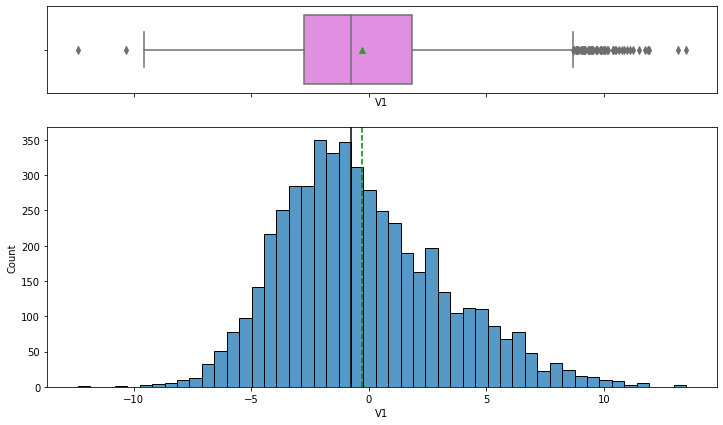

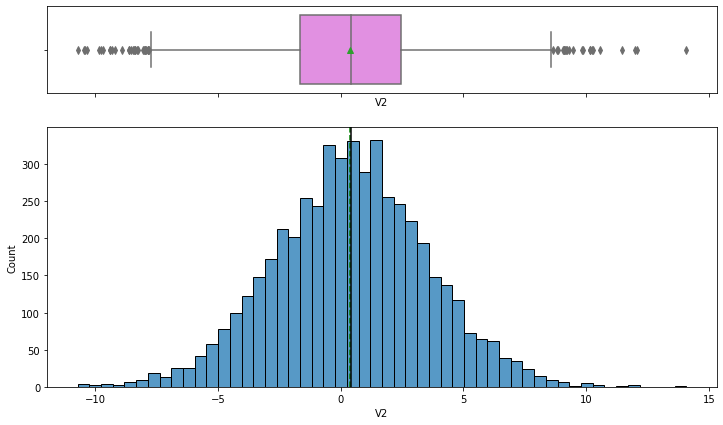

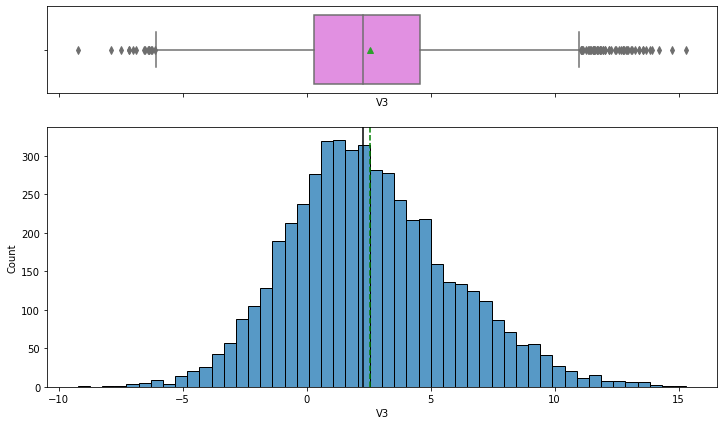

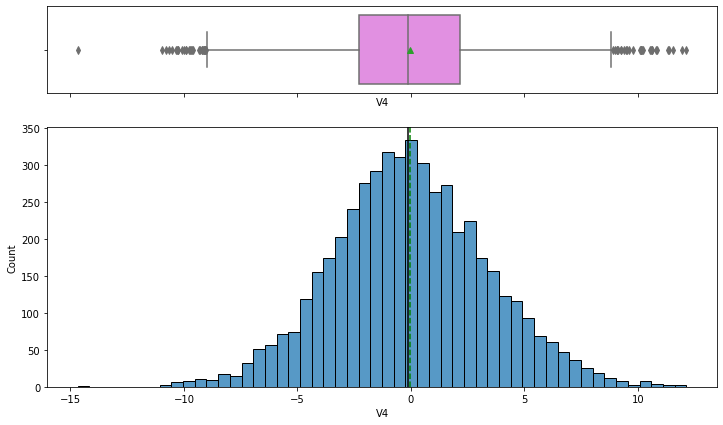

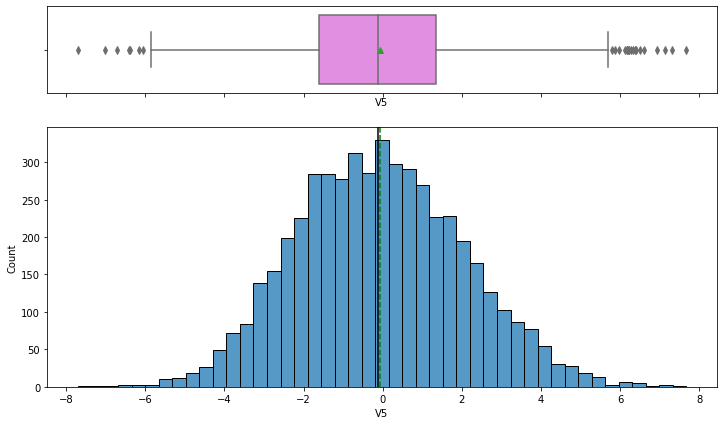

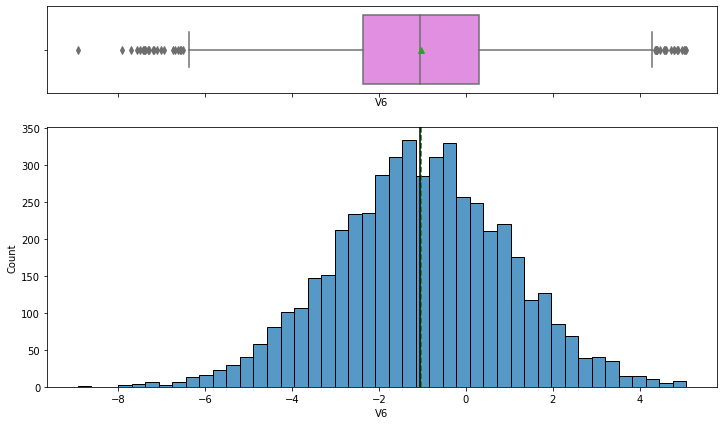

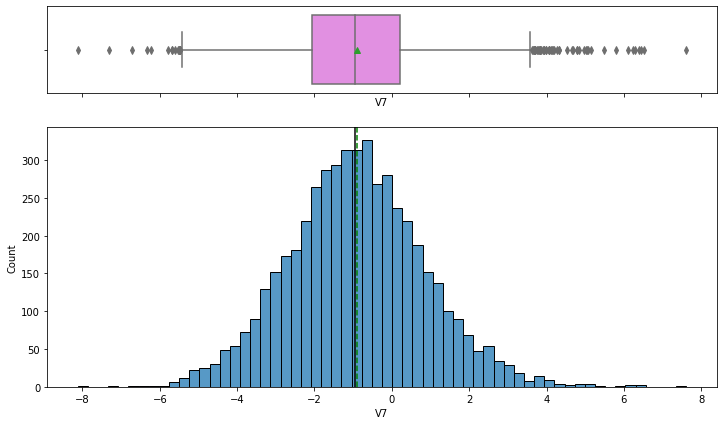

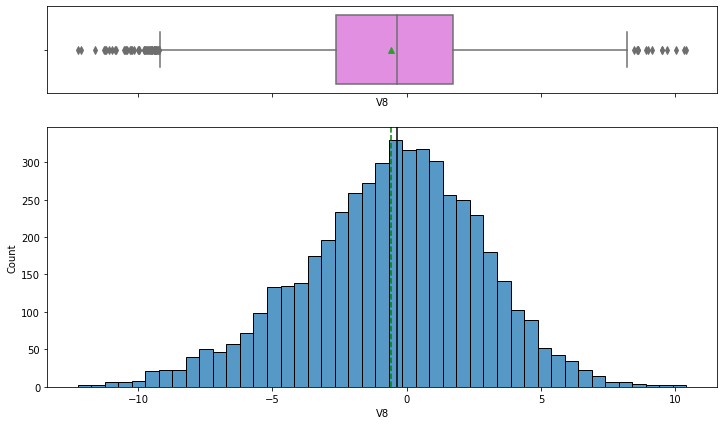

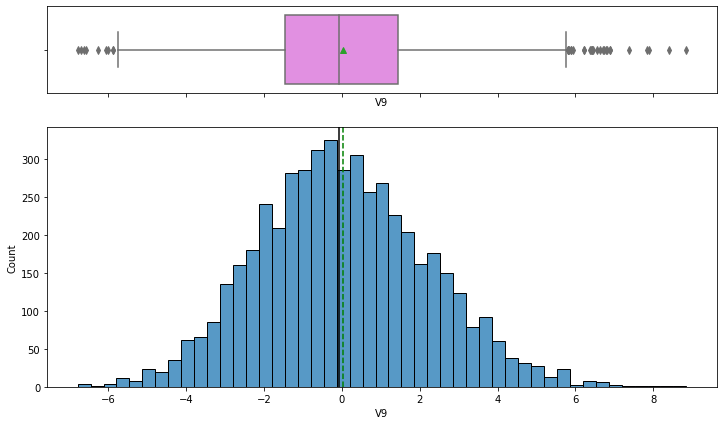

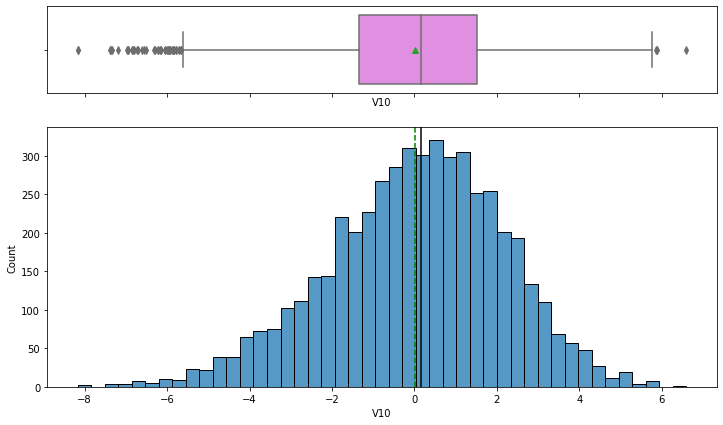

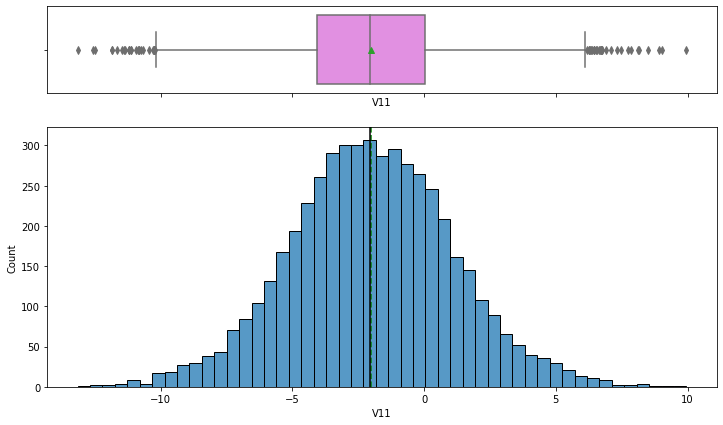

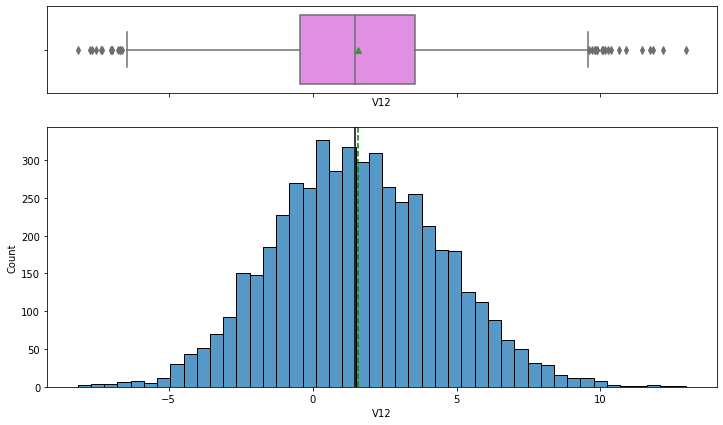

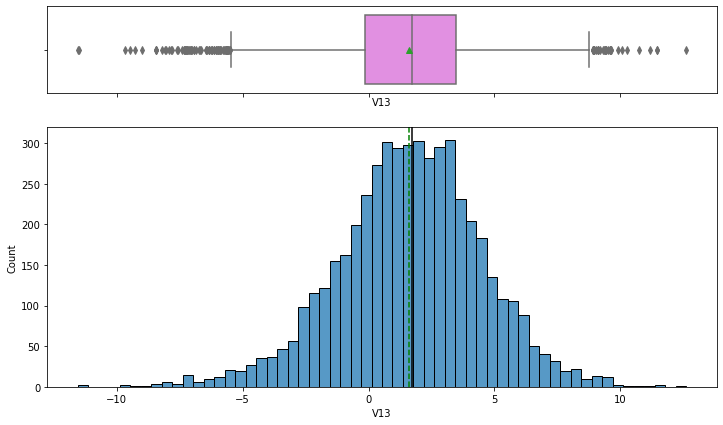

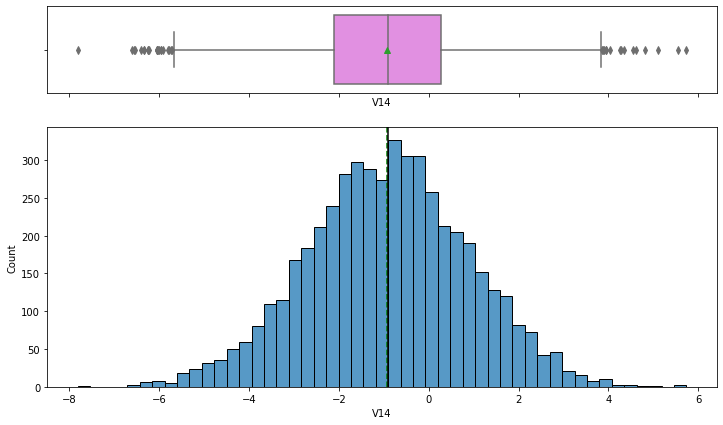

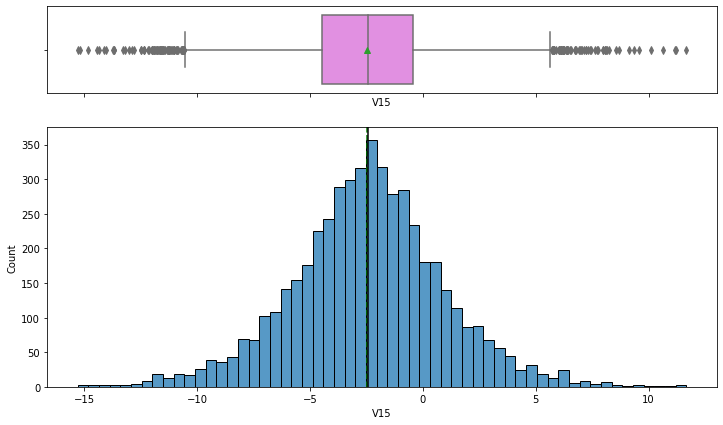

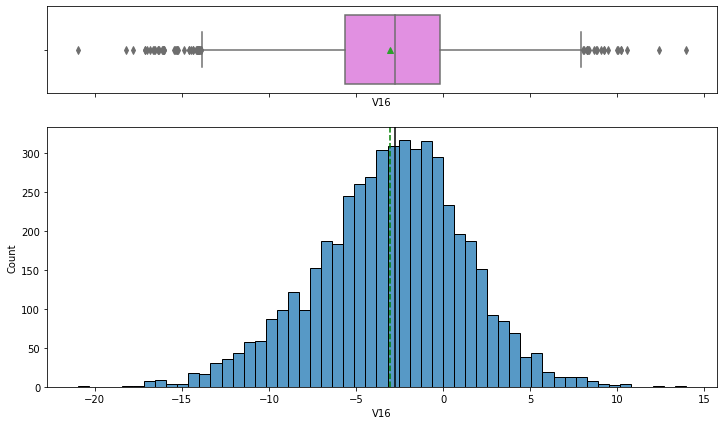

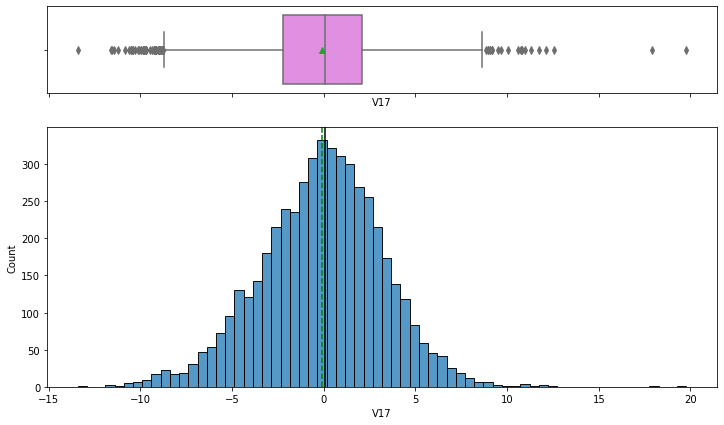

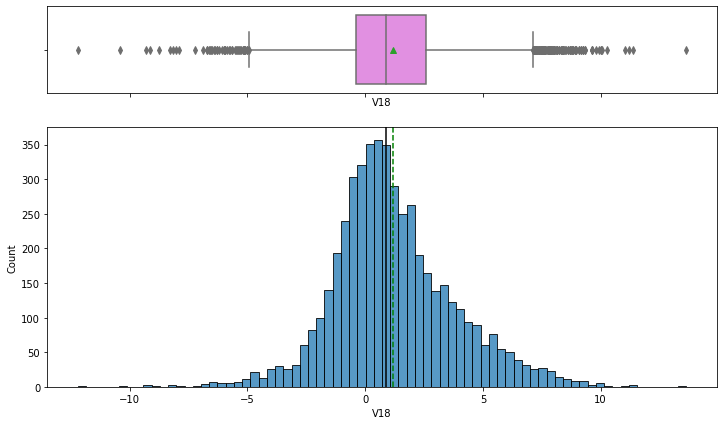

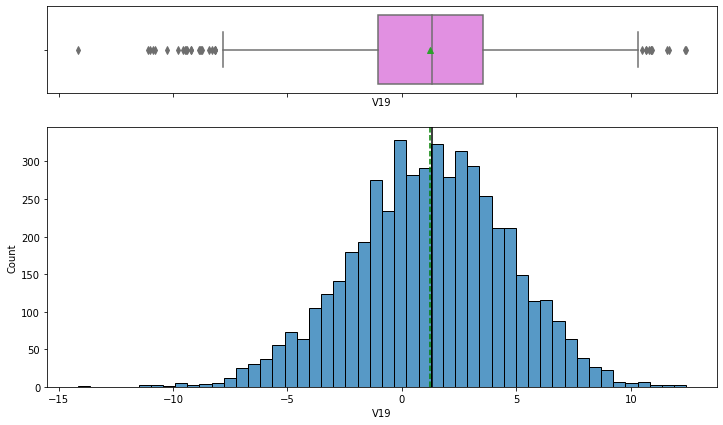

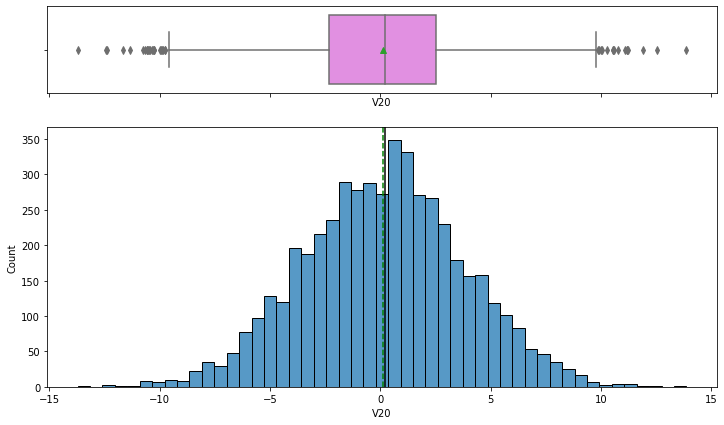

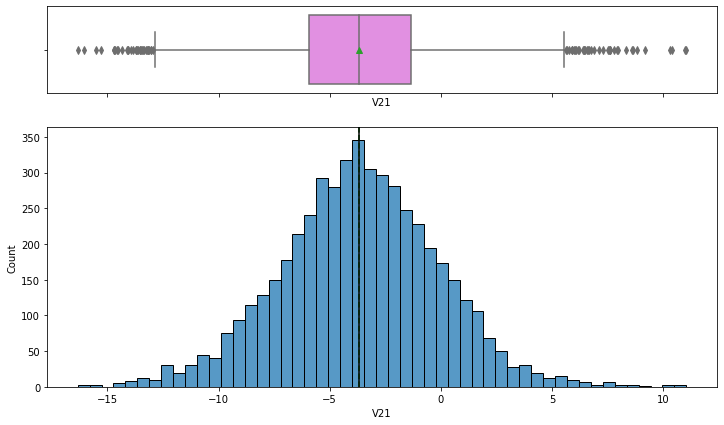

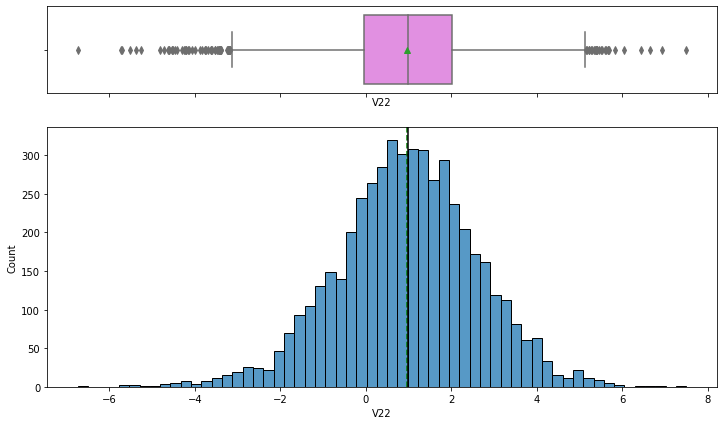

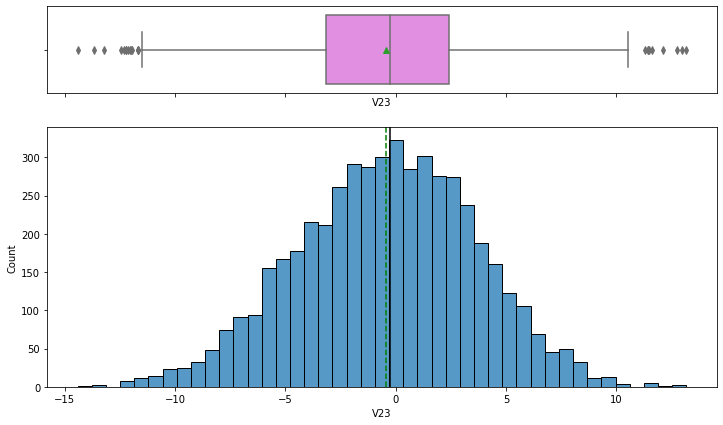

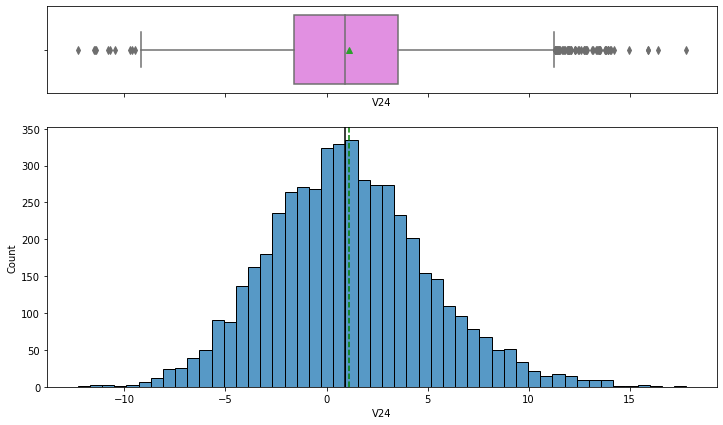

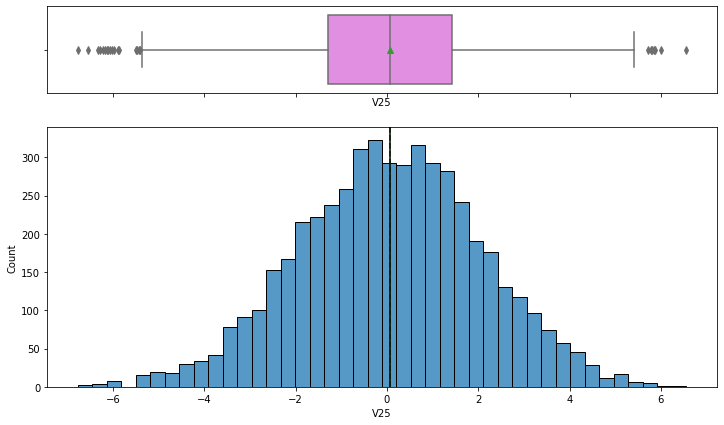

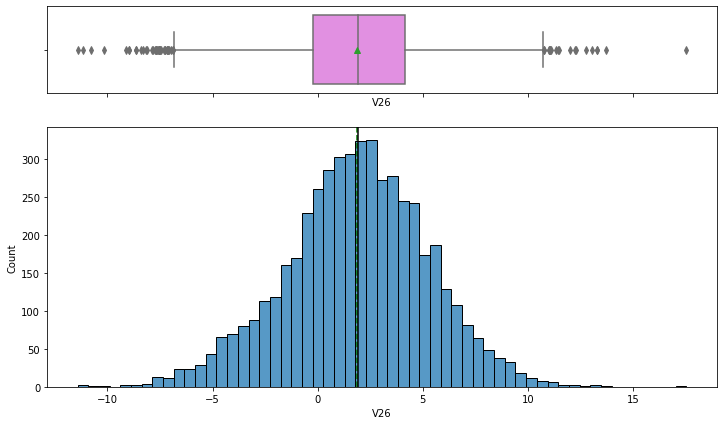

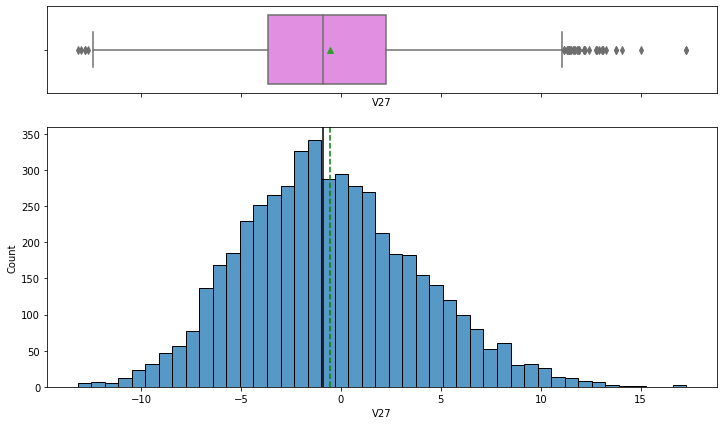

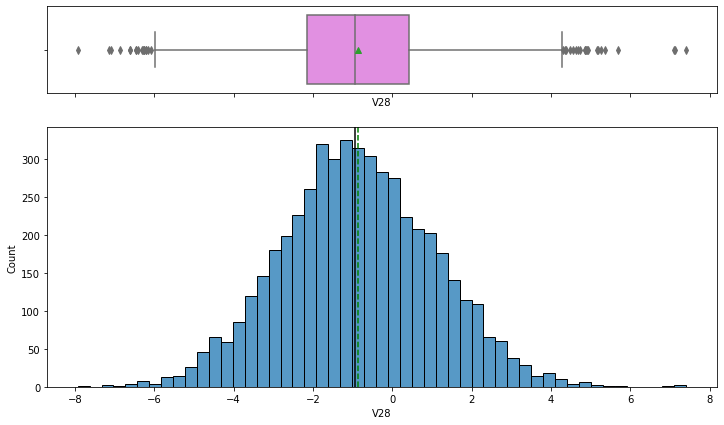

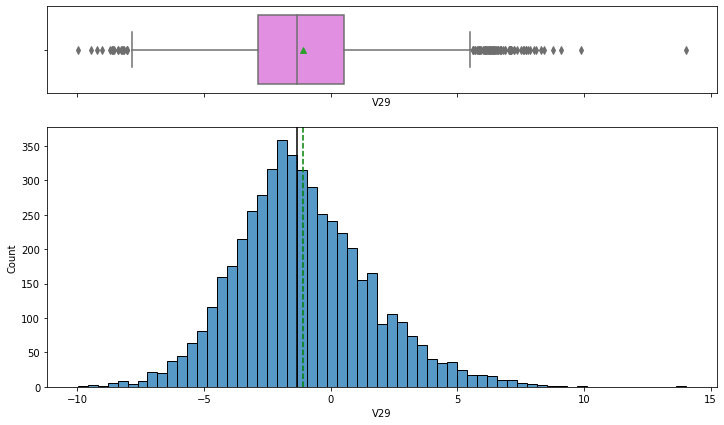

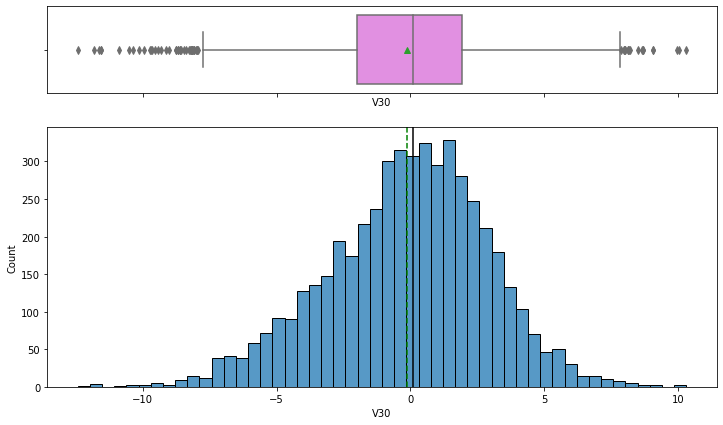

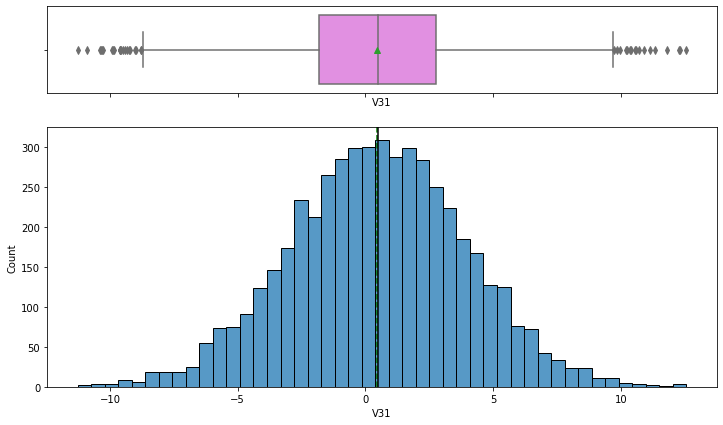

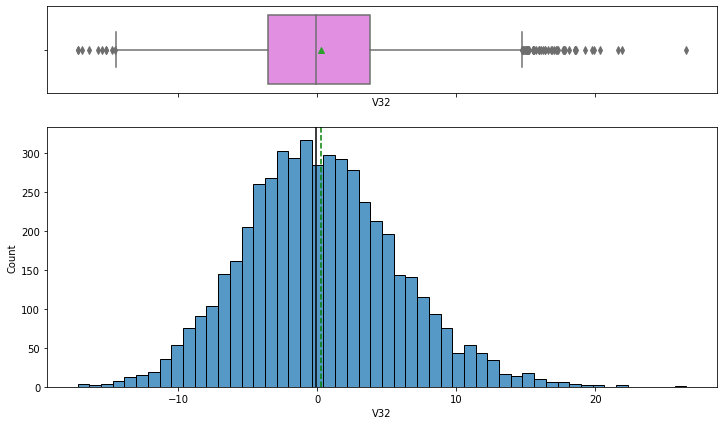

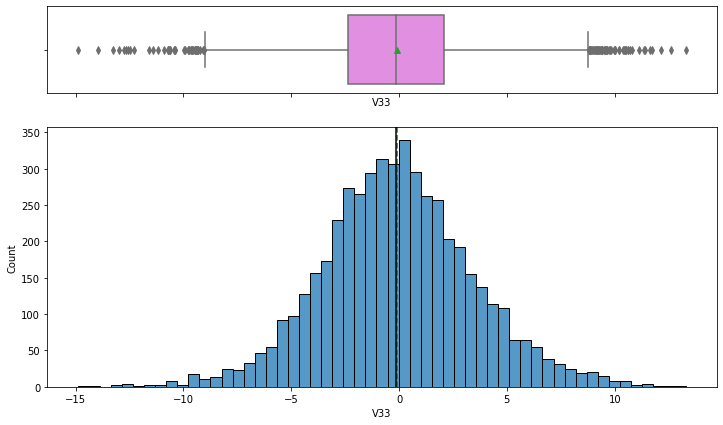

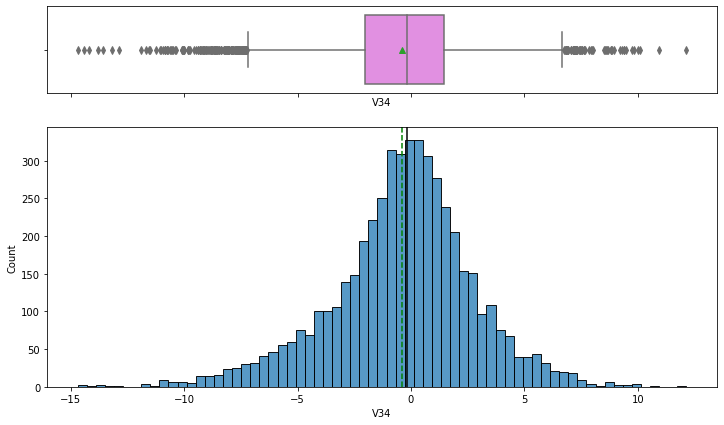

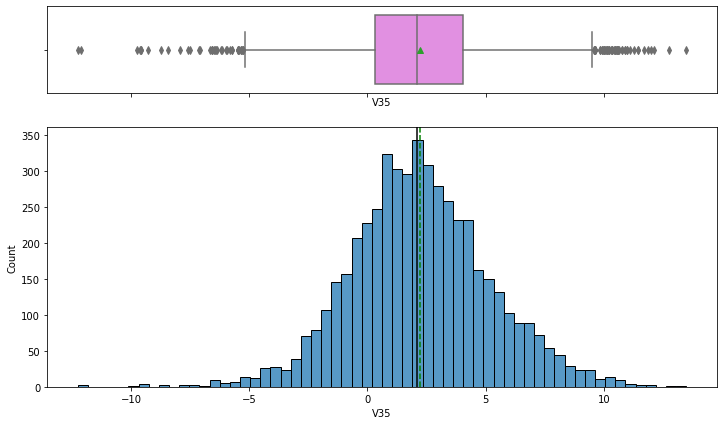

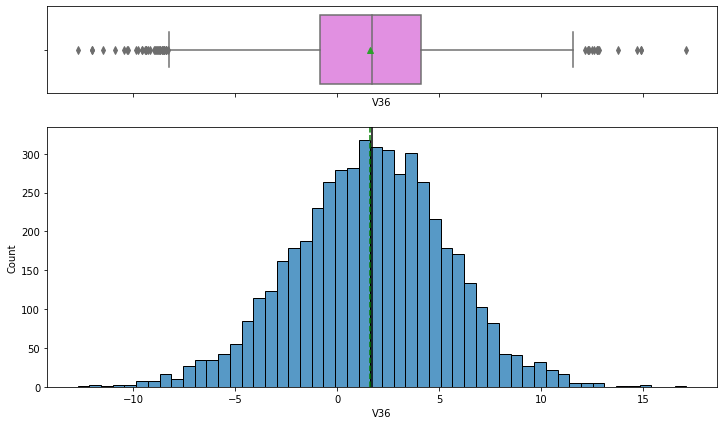

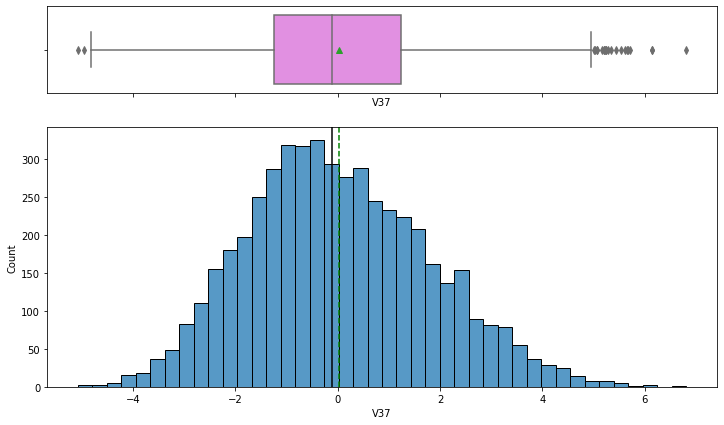

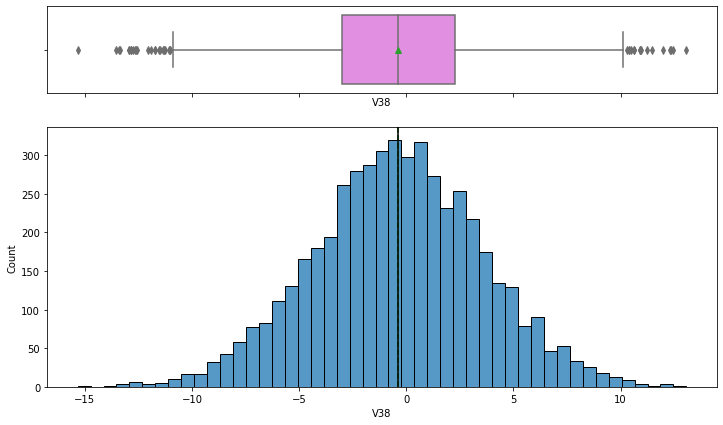

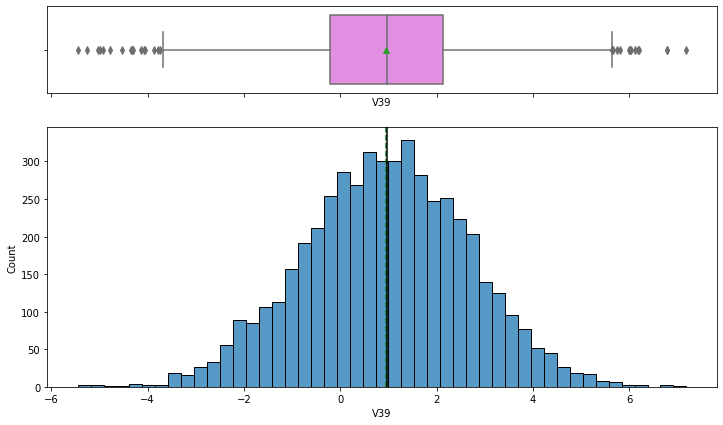

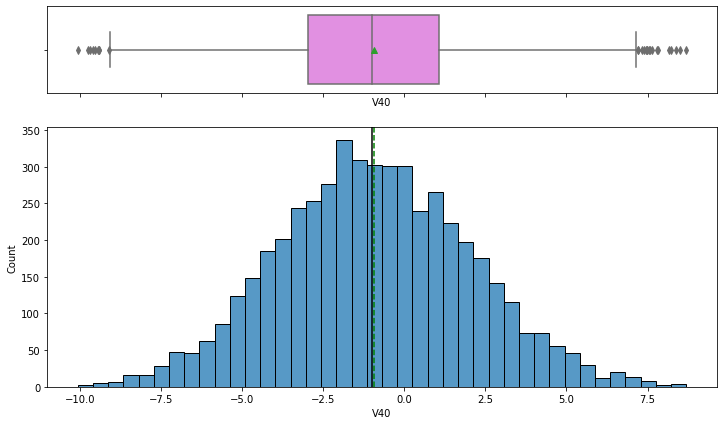

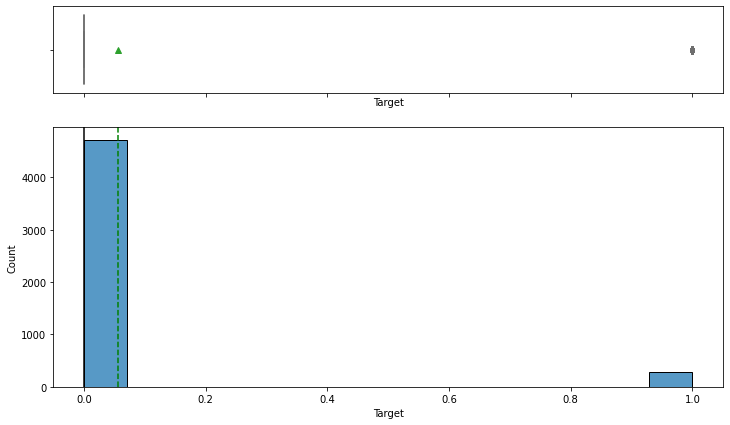

In [ ]:
for feature in df1.columns:
    histogram_boxplot(df1, feature, figsize=(12, 7), kde=False, bins=None) 


-Most of our variables have a normal distribution with no or very little skewness. 

-The variables V11, V15, V16 and V21 have a particularly higher skewness, we should further check them and give them an appropiate treatment as for assuming a normal distribution in our models. 

### **Bivariate analysis**

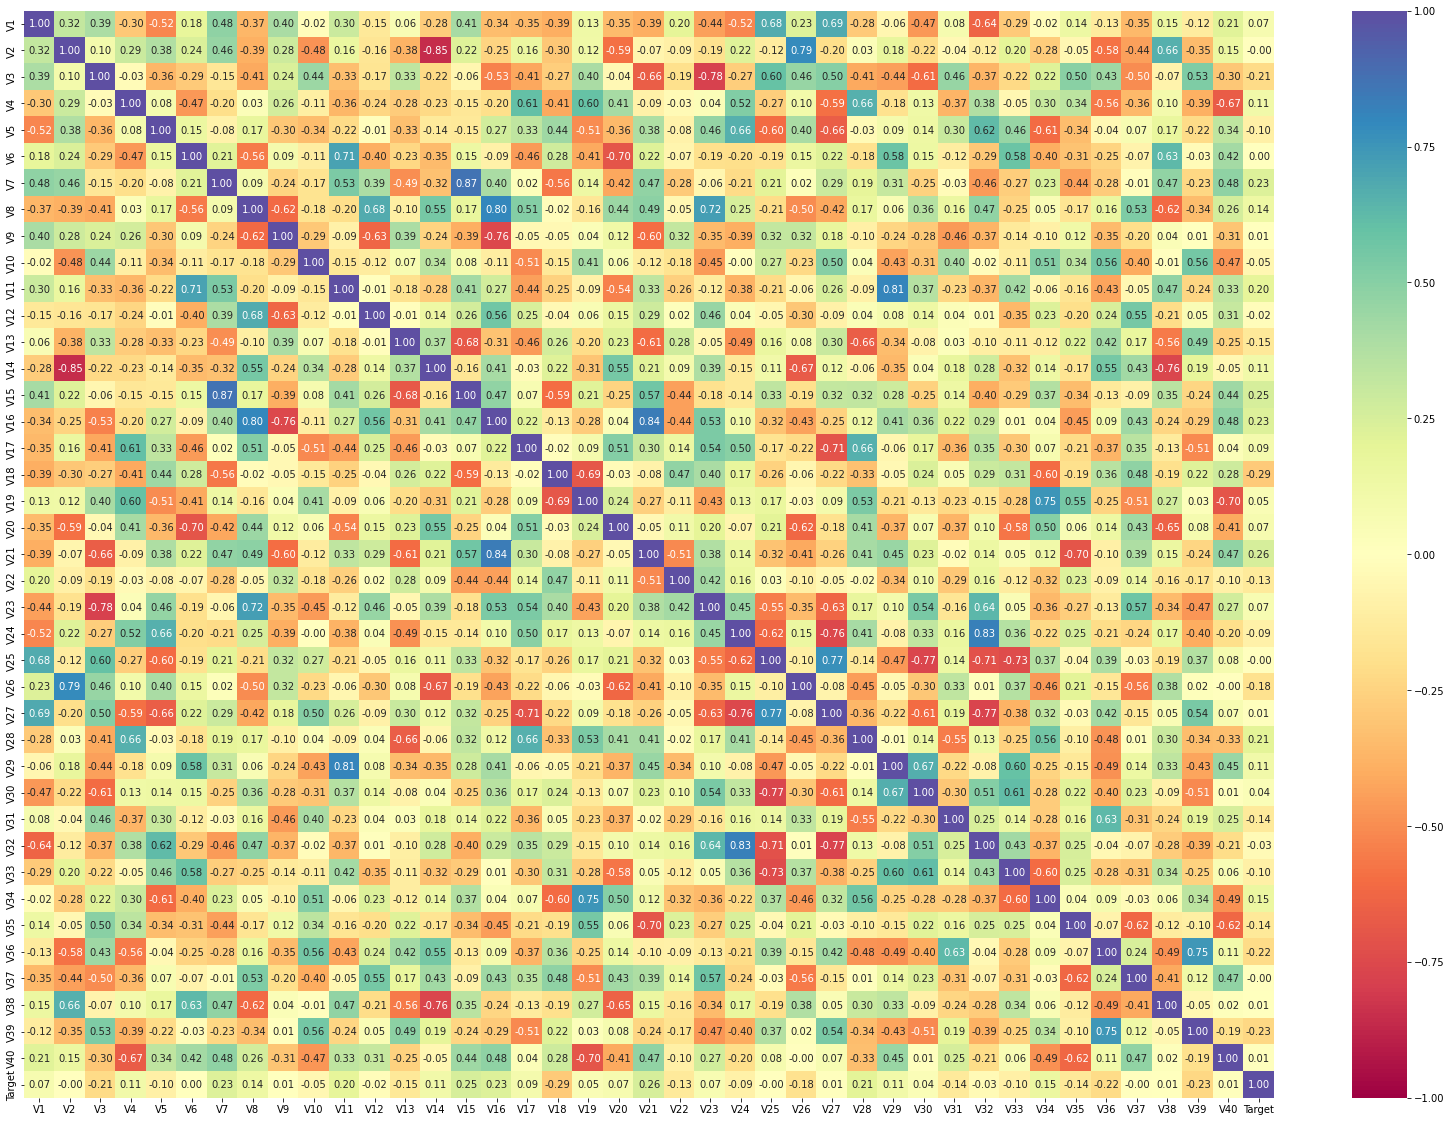

In [ ]:
plt.figure(figsize=(28, 20))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Among the most significant correlations within our variables we found, having set a standard coefficient of more than 0.70 for a strong correlation, are the following : 

-V2 with the variables V14 and V26.

-V3 with V23.

-V6 with the variables V11 and V20.

-V7 with V15. 

-V8 with the variables V15 and V23. 

-V9 with V16. 

-V11 with V29.

-V14 with V38.

-V16 with V21.

-V17 with V27.

-V19 with V24.

-V21 with V35.

-V24 with the variables V27 and V32.

-V25 with V27, V30, V32 and V33.

-V27 with V32.

-V36 with V39.



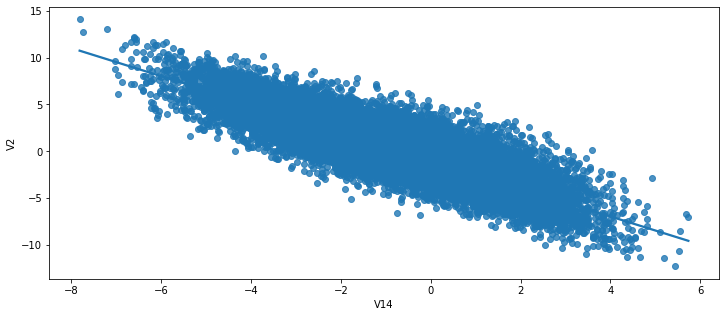

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V2, x=df.V14)

There's a significant negative correlation between variables V2 and V14.

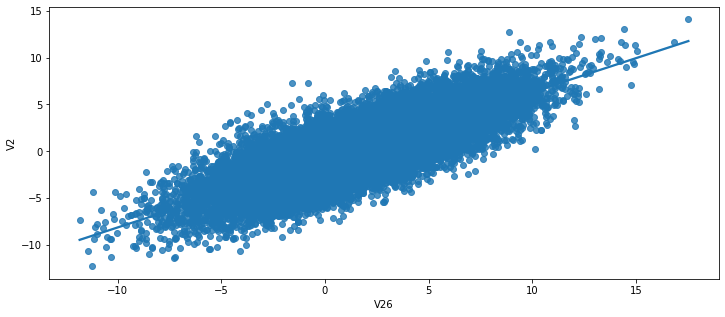

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V2, x=df.V26)

There's a significant positive correlation between V2 and V26

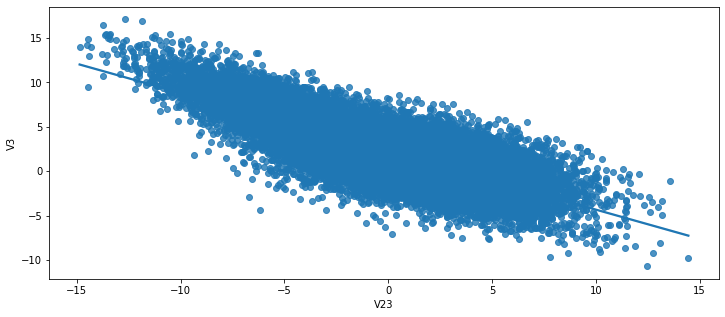

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V3, x=df.V23)

There's a significant negative correlation between V3 and V23.

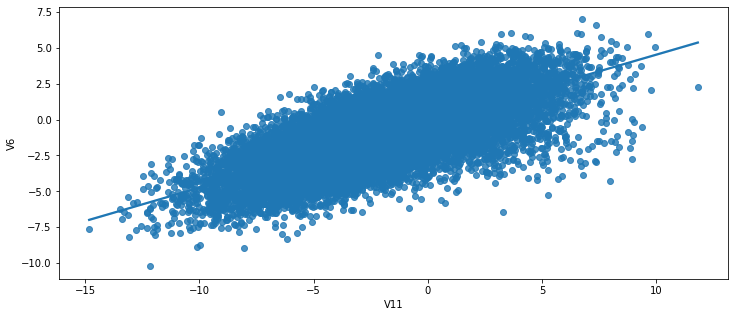

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V6, x=df.V11)

There's a significant positive correlation between V6 and V11.

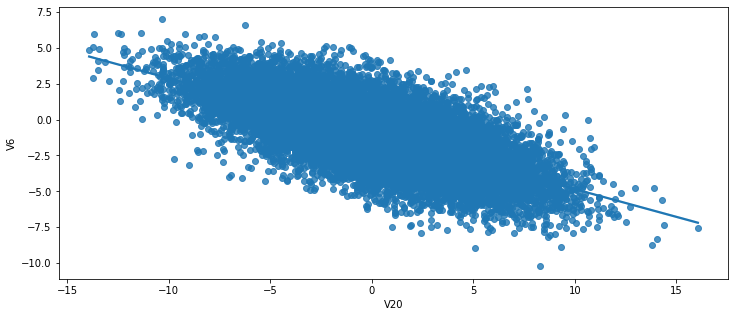

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V6, x=df.V20)

There's a significant negative correlation between V11 and V20

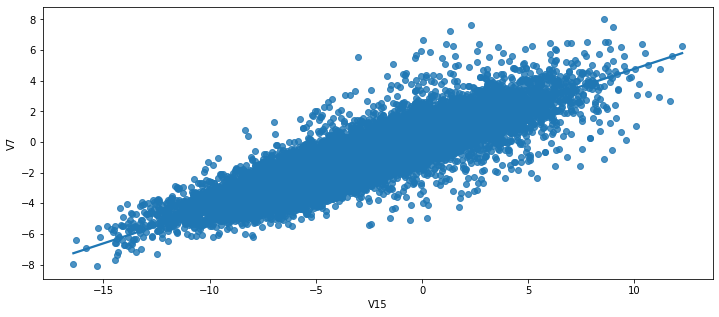

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V7, x=df.V15)

There's a significant positive correlation between V7 and V15.

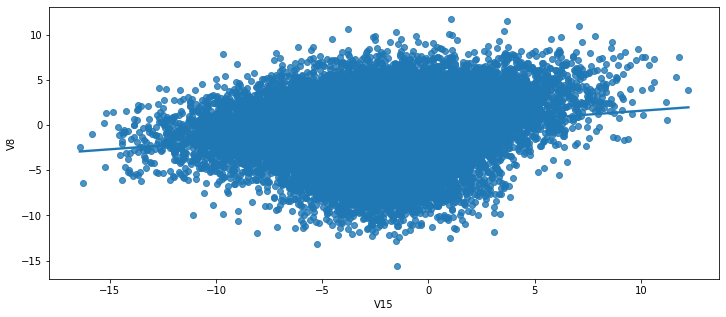

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V8, x=df.V15)

There is no significant correlation between V8 and V15. 

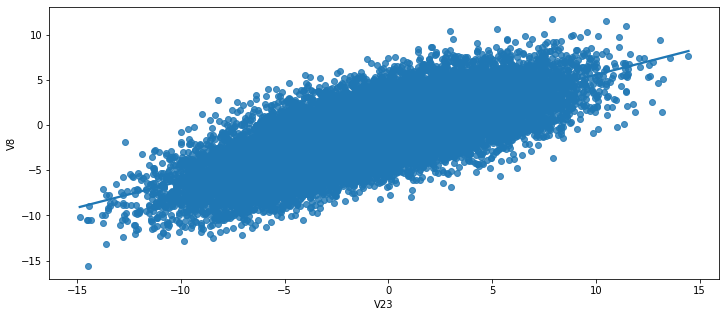

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V8, x=df.V23)

There's a significant positive correlation between V8 and V23.


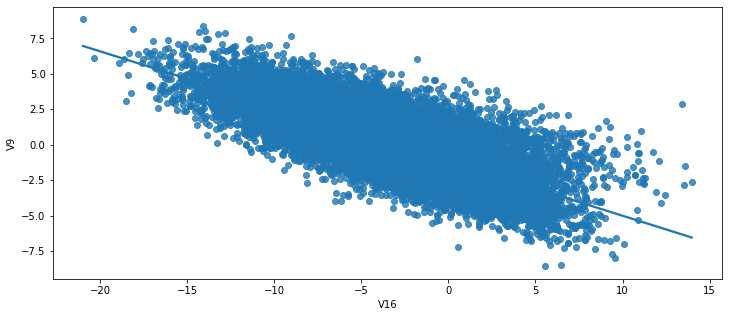

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V9, x=df.V16)

There's a significant negative correlation between V9 and V16.


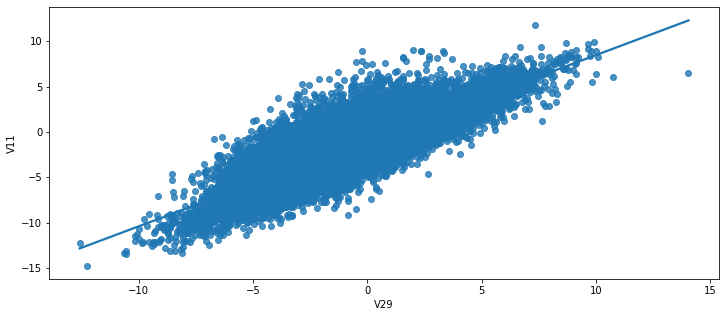

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V11, x=df.V29)

There's a significant positive correlation between V11 and V29.

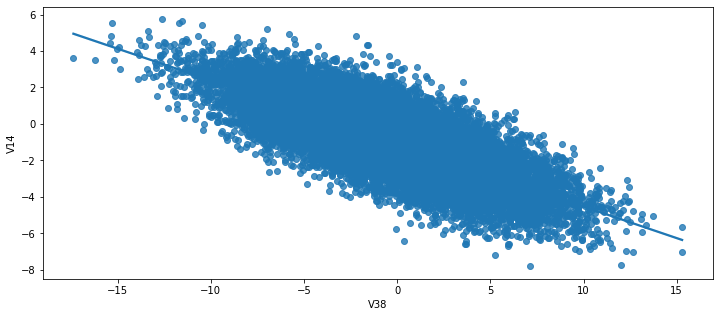

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V14, x=df.V38)

There's a significant negative correlation between V14 and V38.

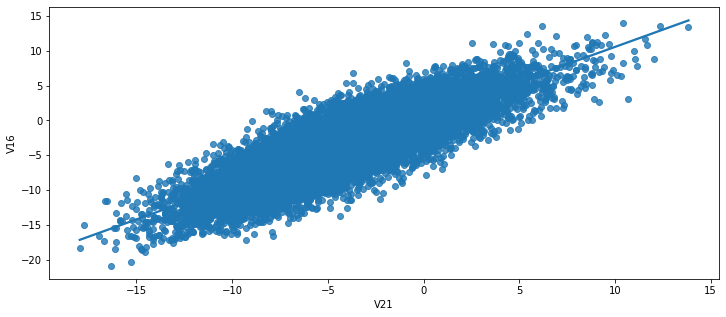

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V16, x=df.V21)

There's a significant positive correlation between V16 and V21.

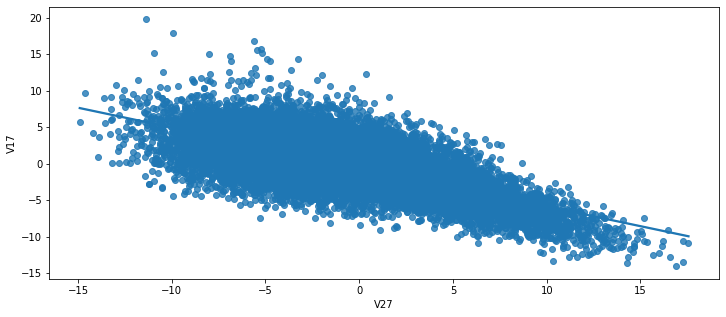

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V17, x=df.V27)

There's a significant negative correlation between V17 and V27.

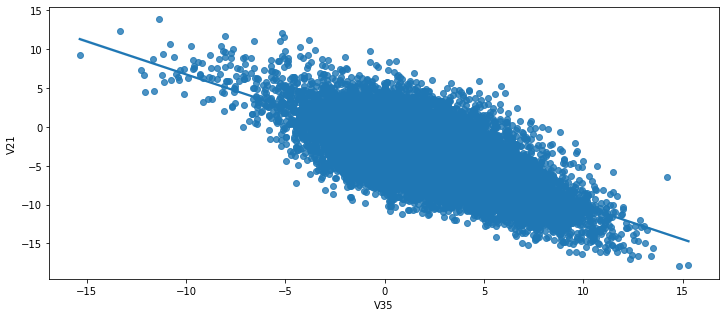

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V21, x=df.V35)

There's a significant negative correlation between V21 and V35.

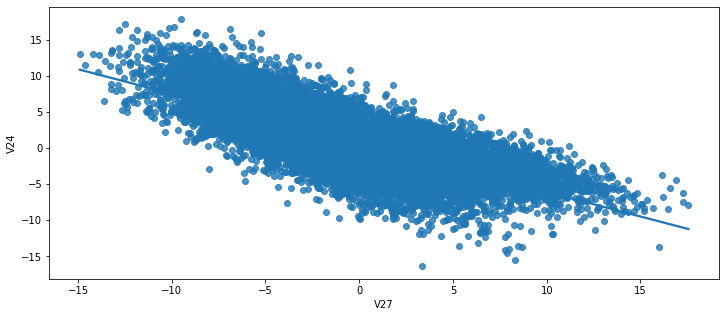

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V24, x=df.V27)

There's a significant negative correlation between V24 and V27.

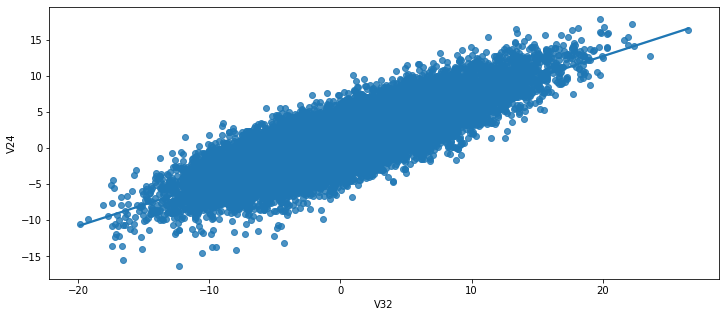

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V24, x=df.V32)

There's a significant positive correlation between V24 and V32.

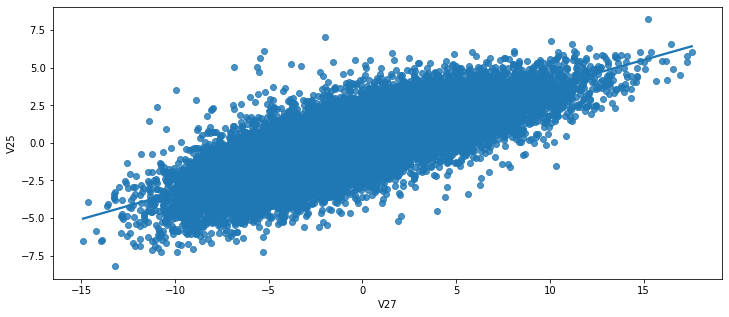

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V25, x=df.V27)

There's a significant positive correlation between V25 and V27.

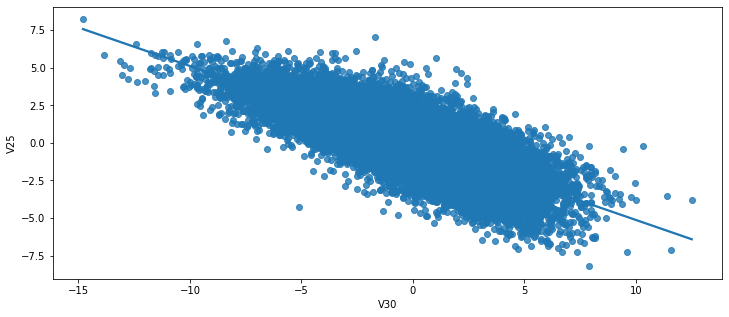

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V25, x=df.V30)

There's a significant negative correlation between V25 and V30.

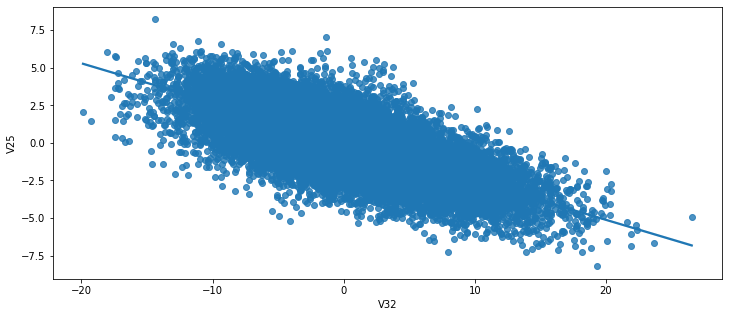

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V25, x=df.V32)

There's a significant negative correlation between V25 and V32.

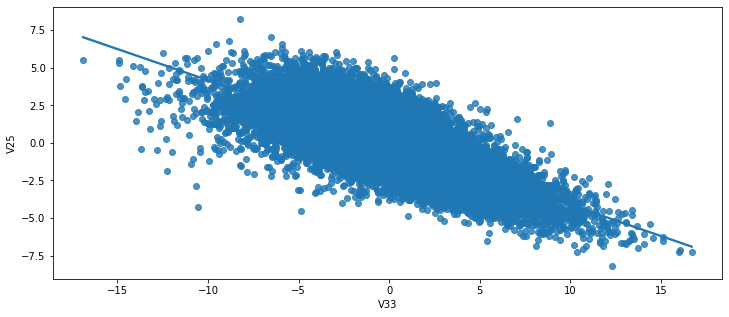

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V25, x=df.V33)

There's a significant negative correlation between V25 and V33.

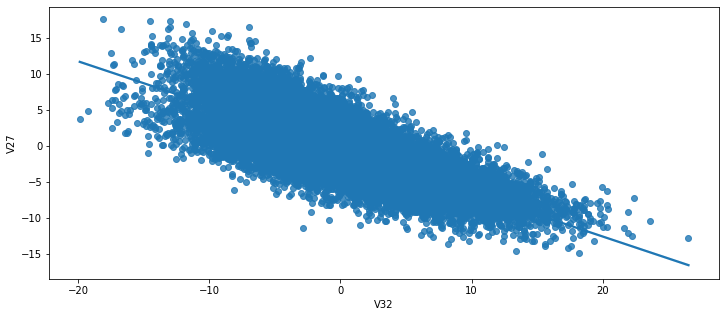

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V27, x=df.V32)

There's a significant positive correlation between V27 and V32.


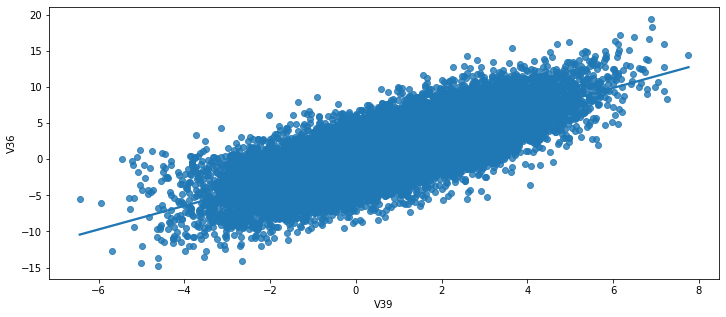

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.V36, x=df.V39)

There's a significant positive correlation between V36 and V39






**After looking at the correlation graphs of sevaral variables in our model, we can conclude that the variables V2, V3, V6, V7, V8, V9, V11, V14, V16, V17, V20, V21, V23, V24, V25, V27, V29, V30, V32, V33, V35, V36, V38 and V39 are significant enough for out initial model**

After several model check ups, some of our variables may no longer be considered. 

# **Data preprocessing**
**Note**: We will be imputing the missing values from our data. For the testing set, we will be using the file "Test.csv.csv" which we previously saved as df1. 

In [ ]:
##Data preparation
# Separating target variable and other variables
X = df.drop(columns="Target")
X = (X)

Y = df["Target"]

In [ ]:
## Splitting data into training, validation set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)


#  we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.30, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(11200, 40) (4800, 40) (4000, 40)


# **Missing value imputation**


In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

#Transform the test data
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())
print("-" * 30)

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

There are no missing value now in all of our sets, we can now go to the model building part. 

# **Model Building**


### **Model evaluation criterion**

The nature of predictions made by the classification model will translate as follows:

-True positives (TP) are failures correctly predicted by the model.

-False negatives (FN) are real failures in a generator where there is no detection by model.

-False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**


-We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.

-We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.

-We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.



**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
## defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Defining scorer to be used for cross-validation and hyperparameter tuning**

We want to reduce false negatives and will try to maximize "Recall".

To maximize Recall, we can use Recall as a scorer in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# **Model Building with original data**

Sample Decision Tree model building with original data

In [ ]:
%%time 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.6703096774193549
Random forest: 0.7154064516129031
GBM: 0.6992774193548387
Adaboost: 0.594683870967742
Xgboost: 0.7137548387096773
dtree: 0.6993935483870969

Validation Performance:

Bagging: 0.706766917293233
Random forest: 0.7030075187969925
GBM: 0.7368421052631579
Adaboost: 0.6165413533834586
Xgboost: 0.7518796992481203
dtree: 0.7293233082706767
CPU times: user 3min 17s, sys: 87 µs, total: 3min 17s
Wall time: 3min 17s


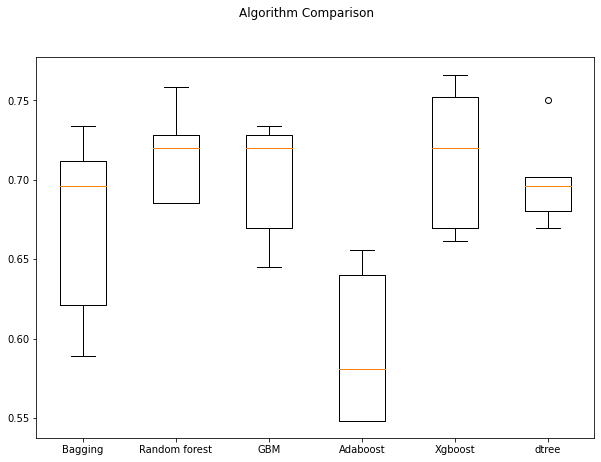

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.6993935483870969

Validation Performance:

dtree: 0.7293233082706767


### **Model Building with Oversampled data**






In [ ]:
# Synthetic Minority Over Sampling Technique
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
%%time 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.9773118020083389
Random forest: 0.983078514705028
GBM: 0.9185105936085304
Adaboost: 0.8935540539936631
Xgboost: 0.9100022344671019
dtree: 0.9658731180200834

Validation Performance:

Bagging: 0.8045112781954887
Random forest: 0.8421052631578947
GBM: 0.8872180451127819
Adaboost: 0.8834586466165414
Xgboost: 0.8834586466165414
dtree: 0.7330827067669173
CPU times: user 5min 39s, sys: 218 ms, total: 5min 40s
Wall time: 5min 42s


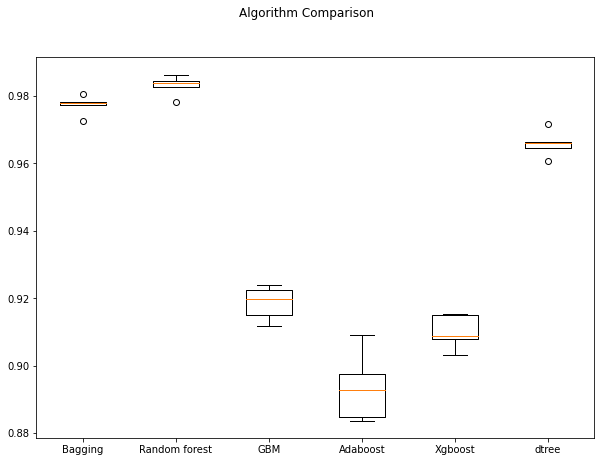

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.9658731180200834

Validation Performance:

dtree: 0.7330827067669173


### **Model Building with Undersampled data**


In [ ]:
# Random undersampler for under sampling the data
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)



In [ ]:
%%time 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.8440774193548387
Random forest: 0.8826580645161289
GBM: 0.8746064516129032
Adaboost: 0.8424258064516128
Xgboost: 0.8714193548387096
dtree: 0.8311612903225806

Validation Performance:

Bagging: 0.868421052631579
Random forest: 0.9060150375939849
GBM: 0.9022556390977443
Adaboost: 0.8947368421052632
Xgboost: 0.8909774436090225
dtree: 0.8646616541353384
CPU times: user 15.7 s, sys: 35.2 ms, total: 15.7 s
Wall time: 15.7 s


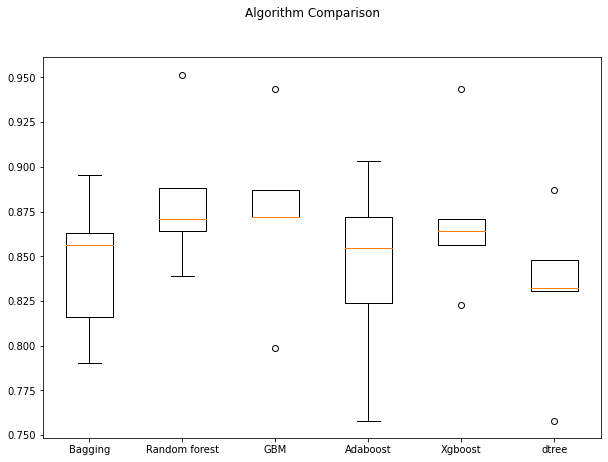

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.8311612903225806

Validation Performance:

dtree: 0.8646616541353384


#**HyperparameterTuning**
###**Sample Parameter Grids**
**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

For Gradient Boosting:
param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

For Adaboost:
param_grid = { "n_estimators": [100, 150, 200], "learning_rate": [0.2, 0.05], "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1), ] }

For Bagging Classifier:
param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70], }

For Random Forest:
param_grid = { "n_estimators": [200,250,300], "min_samples_leaf": np.arange(1, 4), "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], "max_samples": np.arange(0.4, 0.7, 0.1) }

For Decision Trees:
param_grid = { 'max_depth': np.arange(2,6), 'min_samples_leaf': [1, 4, 7], 'max_leaf_nodes' : [10, 15], 'min_impurity_decrease': [0.0001,0.001] }

For Logistic Regression:
param_grid = {'C': np.arange(0.1,1.1,0.1)}

For XGBoost:
param_grid={ 'n_estimators': [150, 200, 250], 'scale_pos_weight': [5,10], 'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }



###Decision tree

In [ ]:
# original model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5177032258064516:


In [ ]:
# oversampled model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 2} with CV score=0.9067886685704327:


In [ ]:
# undersampled model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 10, 'max_depth': 2} with CV score=0.8231483870967742:


In [ ]:
# building model with best parameters
dt_tuned_grid = DecisionTreeClassifier(
     max_depth= 5,
    min_samples_leaf= 1,
    max_leaf_nodes= 15,
    min_impurity_decrease= 0.0001,
)

# Fit the model on training data
dt_tuned_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001)

In [ ]:
dt_grid_train = model_performance_classification_sklearn(
    dt_tuned_grid, X_train, y_train
)
dt_grid_train

Accuracy  Recall  Precision    F1
0     0.930   0.818      0.433 0.566

In [ ]:
dt_grid_val = model_performance_classification_sklearn(
    dt_tuned_grid, X_val, y_val
)
dt_grid_val

Accuracy  Recall  Precision    F1
0     0.935   0.816      0.454 0.583

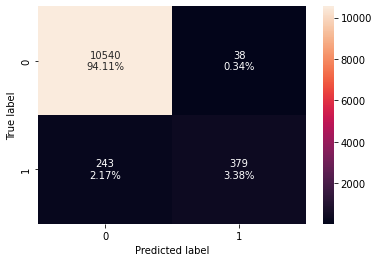

In [ ]:
confusion_matrix_sklearn(dt_tuned_grid, X_train, y_train)


-The tuned dtree model is overfitting the training data

-The validation recall is bigger than 50% i.e. the model is good at identifying the likelihood of failure. 

In [ ]:
# building model with best parameters
dt_tuned = DecisionTreeClassifier(
     max_depth= 5,
    min_samples_leaf= 2,
    max_leaf_nodes= 15,
    min_impurity_decrease= 0.0001,
)

# Fit the model on training data
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=2)

In [ ]:
## To check the performance on training set
dt_random_train = model_performance_classification_sklearn(
    dt_tuned, X_train, y_train
)
dt_random_train

Accuracy  Recall  Precision    F1
0     0.975   0.609      0.909 0.730

In [ ]:
## To check the performance on validation set
dt_random_val = model_performance_classification_sklearn(
    dt_tuned, X_val, y_val
)
dt_random_val

Accuracy  Recall  Precision    F1
0     0.973   0.575      0.890 0.699

###Gradient Boosting

In [ ]:
# original model
Model = GradientBoostingClassifier(random_state=1)

# Parameter gradient boosting to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.7315354838709677:


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.7,
    random_state=1,
    learning_rate=1,
    n_estimators=75,
    subsample=0.3
)

tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=75,
                           random_state=1, subsample=0.3)

In [ ]:
gbm_random_train= model_performance_classification_sklearn(
    tuned_gbm, X_train, y_train
)
gbm_random_train

Accuracy  Recall  Precision    F1
0     0.964   0.672      0.681 0.676

In [ ]:
gbm_random_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_random_val

Accuracy  Recall  Precision    F1
0     0.957   0.617      0.612 0.614

This model has a reasonably high accuracy of 0.957, with a recall of 0.617, making it one of our best models so far.

In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.7,
    random_state=1,
    learning_rate=1,
    n_estimators=50,
    subsample=0.2
)

tuned_gbm1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=50,
                           random_state=1, subsample=0.2)

In [ ]:
gbm_grid_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train, y_train
)
gbm_grid_train

Accuracy  Recall  Precision    F1
0     0.951   0.688      0.546 0.609

In [ ]:
gbm_grid_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm_grid_val

Accuracy  Recall  Precision    F1
0     0.945   0.628      0.503 0.559

###Adaboost

In [ ]:
# original model
Model = AdaBoostClassifier(random_state=1)

# Parameter gradient boosting to pass in RandomSearchCV
param_grid = { "n_estimators": [100, 150, 200], "learning_rate": [0.2, 0.05], "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1), ] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7314838709677419:


In [ ]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=30,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=30, random_state=1)

In [ ]:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn(
    adb_tuned1, X_train, y_train
)
print("Training performance:")
Adaboost_grid_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.984   0.765      0.933 0.841

In [ ]:
# Calculating different metrics on validation set
Adaboost_grid_val = model_performance_classification_sklearn(adb_tuned1, X_val, y_val)
print("Validation performance:")
Adaboost_grid_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.980   0.707      0.922 0.800

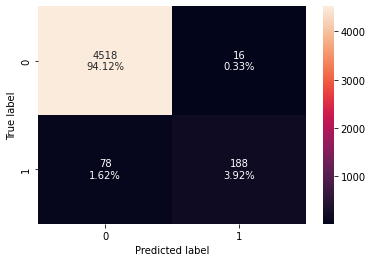

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_val, y_val)

This is our best model so far with a minimum of false positives and false negatives, as well as high scores of every indicator. 

In [ ]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=20,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1, n_estimators=20, random_state=1)

In [ ]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.991   0.870      0.973 0.919

In [ ]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.981   0.756      0.893 0.819

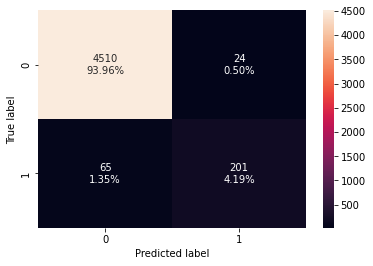

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

# **Model performance comparison and choosing the final model**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Adaboost_grid_train.T,
        Adaboost_random_train.T,
        gbm_grid_train.T,
        gbm_random_train.T,
        dt_grid_train.T,
        dt_random_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "Gradient Boosting Tuned with Grid search",
    "Gradient Boosting Tuned with Random search",
    "Decision tree with grid search",
    "Decision tree with random search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


AdaBoost Tuned with Grid search  AdaBoost Tuned with Random search  \
Accuracy                             0.984                              0.991   
Recall                               0.765                              0.870   
Precision                            0.933                              0.973   
F1                                   0.841                              0.919   

           Gradient Boosting Tuned with Grid search  \
Accuracy                                      0.951   
Recall                                        0.688   
Precision                                     0.546   
F1                                            0.609   

           Gradient Boosting Tuned with Random search  \
Accuracy                                        0.964   
Recall                                          0.672   
Precision                                       0.681   
F1                                              0.676   

           Decision tree with grid search  Decision tree with random search  
Accuracy                            0.930                             0.975  
Recall                              0.818                             0.609  
Precision                           0.433                             0.909  
F1                                  0.566                             0.730

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        Adaboost_grid_val.T,
        Adaboost_random_val.T,
        gbm_grid_val.T,
        gbm_random_val.T,
        dt_grid_val.T,
        dt_random_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "Gradient Boosting Tuned with Grid search",
    "Gradient Boosting Tuned with Random search",
    "Decision tree with grid search",
    "Decision tree with random search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


AdaBoost Tuned with Grid search  AdaBoost Tuned with Random search  \
Accuracy                             0.980                              0.981   
Recall                               0.707                              0.756   
Precision                            0.922                              0.893   
F1                                   0.800                              0.819   

           Gradient Boosting Tuned with Grid search  \
Accuracy                                      0.945   
Recall                                        0.628   
Precision                                     0.503   
F1                                            0.559   

           Gradient Boosting Tuned with Random search  \
Accuracy                                        0.957   
Recall                                          0.617   
Precision                                       0.612   
F1                                              0.614   

           Decision tree with grid search  Decision tree with random search  
Accuracy                            0.935                             0.973  
Recall                              0.816                             0.575  
Precision                           0.454                             0.890  
F1                                  0.583                             0.699

We conclude that the AdaBoost Tuning with Random search is our best model available considering its accuracy and recall levels. Therefore we will select it. 

**Let's check our final model by testing it.**

In [ ]:
# Calculating different metrics on the test set
adaboost_random_test = model_performance_classification_sklearn(adb_tuned2, X_test, y_test)
print("Test performance:")
adaboost_random_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.982   0.739      0.911 0.816

-The performance on test data is generalised

-Let's check the important features for prediction as per the the final model

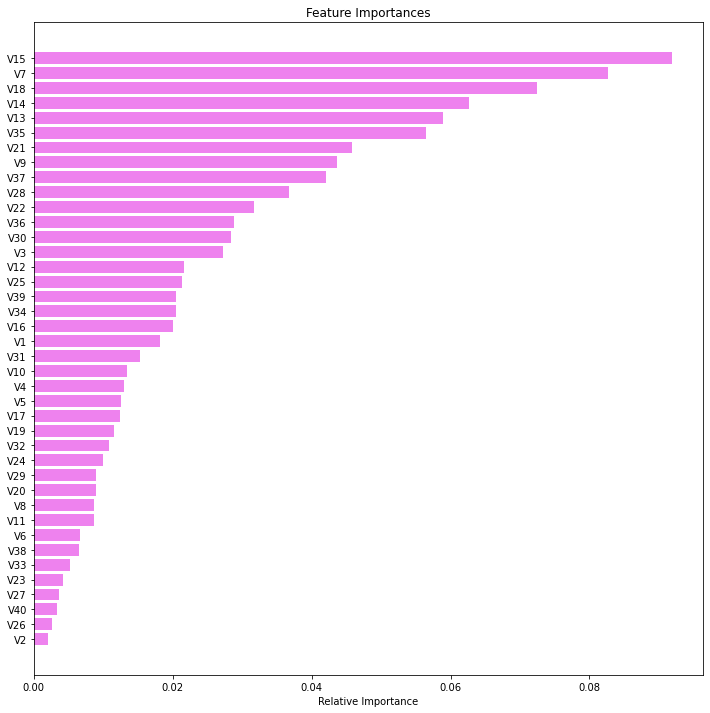

In [ ]:
feature_names = X.columns
importances = tuned_gbm1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### **Pipelines to build the final model**


Now that we have a final model, let's use pipelines to put the model into production. We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable.
How can we personalize the pipeline to perform different preprocessing steps on different columns? - By using Column Transformer
Column Transformer
Column Transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space
This is useful for heterogeneous or columnar data to combine several feature extraction mechanisms or transformations into a single transformer
We will create 2 different pipelines, one for numerical columns and one for categorical columns
For numerical columns, we will do missing value imputation as pre-processing
For categorical columns, we will do one hot encoding and missing value imputation as pre-processing
Note: We will be doing missing value imputation for the whole data so that if there are any missing values in the data in future, they can be taken car

In [266]:
# creating a list of numerical variables
numerical_features = [
    "V15",
    "V7",
    "V18",
    "V14",
    "V13",
    "V35",
    "V21"
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
    ]
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes



In [ ]:
# Separating target variable and other variables
X = df.drop(columns="Target")
Y = df["Target"]

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(20000, 40) (5000, 40)


In [267]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "AdaBoostClassifier",
            AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1, n_estimators=20, random_state=1
        ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['V15', 'V7', 'V18', 'V14',
                                                   'V13', 'V35', 'V21'])])),
                ('AdaBoostClassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=20,
                                    random_state=1))])

In [268]:
# Let's check the performance on test set
Model_test = model_performance_classification_sklearn(model, X_test, y_test)
Model_test

Accuracy  Recall  Precision    F1
0     0.968   0.590      0.788 0.675

# **Business Insights and Conclusions**

So far, our model presented a 96.8 % accuracy rate, a 78.8 % precision rate and a 59% recall rate, being a relatively good prediction model for the failure of an engine. Some key reccomendations for improving further modeling would be to have a larger base of hidden sensors so there is a more significative sample to develop a model with a higher prediction rate. 
